# Loan Application Status Prediction

# Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
df = pd.read_csv('Loan.csv')


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.shape

(614, 13)

Feature Columns:
Loan_ID : loan application id (unique for all applicant)

Gender : Gender of the applicant (male/female)

Married : marital status of the applicant (Yes/No)

Dependents : Number of dependents on the applicant

Education : Education level of the applicant

Self_Employed : Shows if the applicant is self employed or not

ApplicantIncome : Income of the applicant

CoapplicantIncome : Income of the coapplicant

LoanAmount : loan amount

Loan_Amount_Term : term of loan in months

Credit_History : credit history of the applicant

Property_Area : property area of the applicant (Urban/Semi-urban/rural)

Target Column:
Loan_Status : the loan is approved or not.

In [7]:
 df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Value present in Dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Column Data Types:
4 columns are of type float64.

1 column is of type int64.

8 columns are of type object.


# Overview of Missing Values:
Gender: 13 missing values.

Married: 3 missing values.

Dependents: 15 missing values.

Self_Employed: 32 missing values.

LoanAmount: 22 missing values.

Loan_Amount_Term: 14 missing values.

Credit_History: 50 missing values.

Given this information, here's a breakdown of the columns:


# Numerical Data:

ApplicantIncome: int64.
    
CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History: float64.

# Categorical/Object Data:

Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status: object.

# Analysis of Target Volume

Y    422
N    192
Name: Loan_Status, dtype: int64


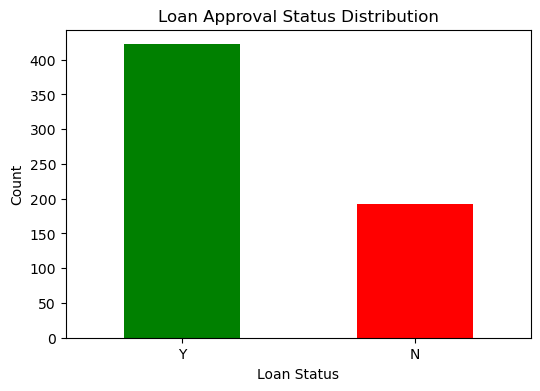

In [9]:
# Assuming 'data' is your DataFrame
loan_status_counts = df['Loan_Status'].value_counts()

# Display the counts
print(loan_status_counts)

# Plotting a bar chart
plt.figure(figsize=(6, 4))
loan_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

This shows an imbalance in the dataset regarding loan approval status, where the number of approved (Y) applications significantly outweighs the number of rejected (N) applications.

# Handling Missing Value

1.Analyze 'Gender' column


Gender Counts Before Filling Missing Values:
Male      489
Female    112
Name: Gender, dtype: int64


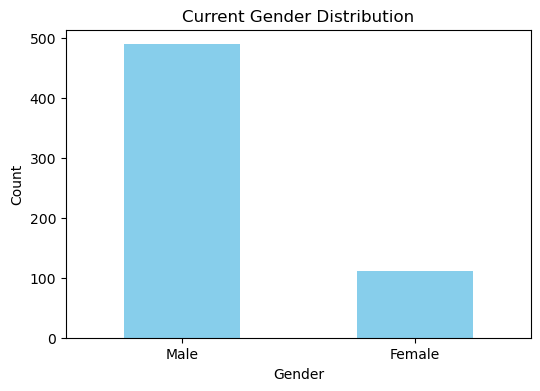

In [10]:
# Display counts of each gender category
gender_counts = df['Gender'].value_counts()
print("Gender Counts Before Filling Missing Values:")
print(gender_counts)

# Plotting the current distribution of 'Gender'
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Current Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Replace Gender column with the mode.

Here male present in higher number.so replace it with male

In [11]:
# Fill missing 'Gender' values with the mode (most frequent gender)
df['Gender'].fillna('Male', inplace=True)

2.Analyze 'Married' column

Married before Filling Missing Values:
Male      489
Female    112
Name: Gender, dtype: int64


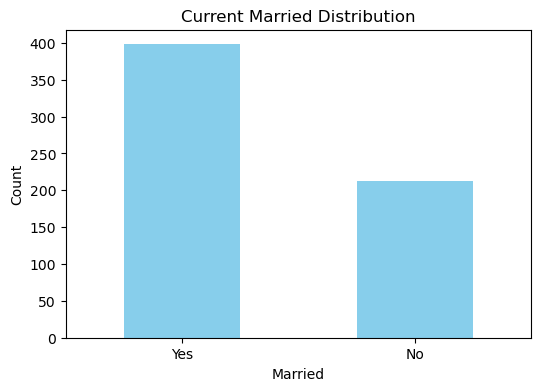

In [12]:
# Display counts of each Married category
Married_counts = df['Married'].value_counts()
print("Married before Filling Missing Values:")
print(gender_counts)

# Plotting the current distribution of 'Married'
plt.figure(figsize=(6, 4))
Married_counts.plot(kind='bar', color='skyblue')
plt.title('Current Married Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Replace married column with the mode.

Here male present in higher number.so replace it with Yes

In [13]:
 #Fill missing 'Married' values with the mode 
df['Married'].fillna('Yes', inplace=True)

3.Analyze 'Dependents' column

Replace Dependentscolumn with the mode.

In [14]:
# Checking for the value counts.

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependent before Filling Missing Values:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


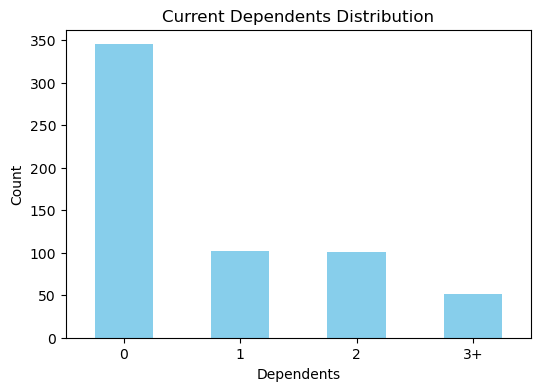

In [15]:
# Display counts of each Dependents'category
Dependents_counts = df['Dependents'].value_counts()                      
print("Dependent before Filling Missing Values:")
print(Dependents_counts)

# Plotting the current distribution of 'Dependents'
plt.figure(figsize=(6, 4))
Dependents_counts.plot(kind='bar', color='skyblue')
plt.title('Current Dependents Distribution')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

After observation Dependents is 0 for most of the applicants, so we'll replace the missing values as 0 dependents.

In [16]:
#Fill missing 'Married' values with the mode 
df['Dependents'].fillna('0', inplace=True)

4. Analyze 'Self_Employed'column

Replace self_employedcolumn with the mode.

Replace Dependentscolumn with the mode.

In [17]:
# Checking for the value counts.

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Self_Employed before Filling Missing Values:
Male      489
Female    112
Name: Gender, dtype: int64


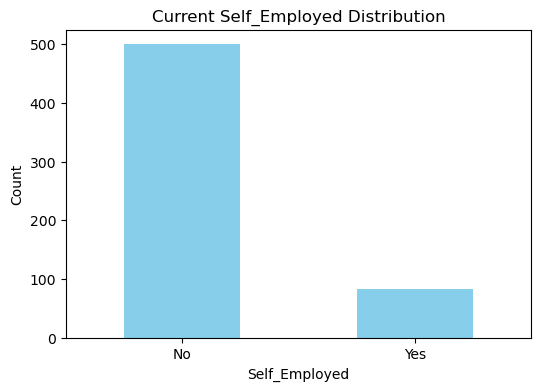

In [18]:
# Display counts of each'Self_Employed 'category
Dependents_counts = df['Self_Employed'].value_counts()                      
print("Self_Employed before Filling Missing Values:")
print(gender_counts)

# Plotting the current distribution of 'Self_Employed'
plt.figure(figsize=(6, 4))
Dependents_counts.plot(kind='bar', color='skyblue')
plt.title('Current Self_Employed Distribution')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

After observation,self employed applicants is less, so we'll replace the missing values with 'No'

In [19]:
# Replacing the missing values.

df['Self_Employed'].fillna('No', inplace=True)

5.Analyze 'LoanAmount' column

Replace LoanAmount column with mean value

In [20]:
# Checking for the mean

df['LoanAmount'].mean()

146.41216216216216

In [21]:
# Replacing the missing values with the mean value.

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

Analyze 'Loan_Amount_Term' column

Replace  Loan_Amount_Term column with the median value.

In [22]:
# Checking for the mean.

df['Loan_Amount_Term'].median()

360.0

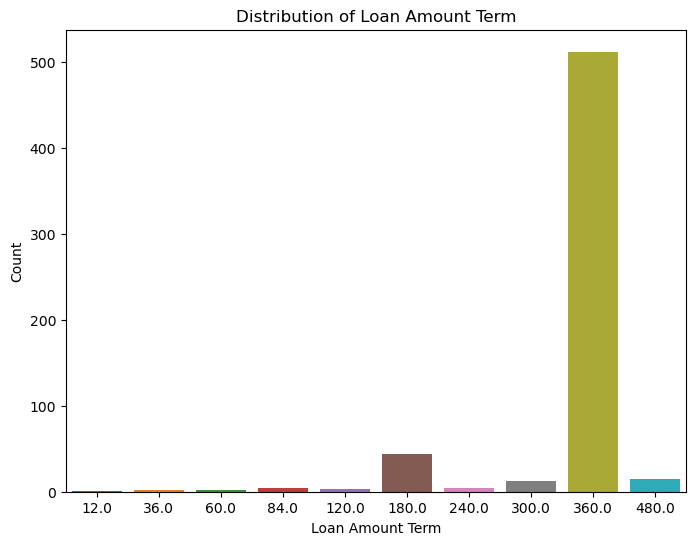

In [23]:
plt.figure(figsize=[8,6])
sns.countplot(x='Loan_Amount_Term', data=df)
plt.ylabel('Count')
plt.xlabel('Loan Amount Term')
plt.title('Distribution of Loan Amount Term')
plt.show()

In [24]:
# Replacing the missing values with the median

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

Analyze'Credit_History' column

 Replace the 'Credit_History column' with the mode.

In [25]:
# Checking for the value count.

df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

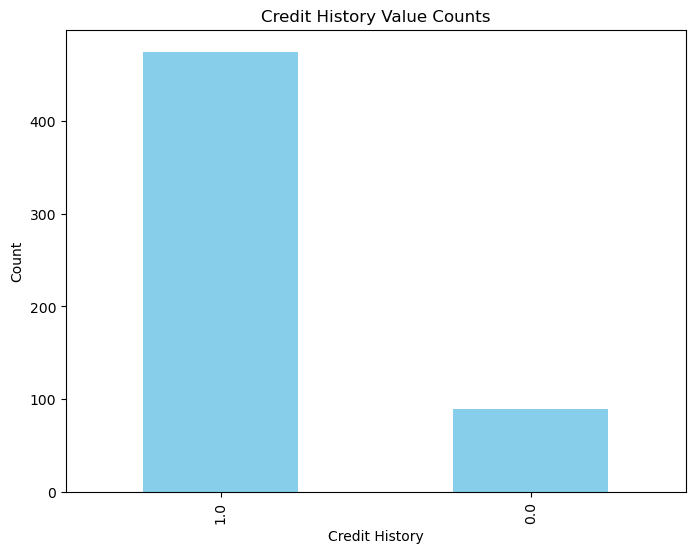

In [26]:
plt.figure(figsize=(8, 6))
df['Credit_History'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Credit History Value Counts')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

 Most of the applicant has the Credit_History as 1.0. So, we'll replace the missing values with 1.0

In [27]:
# Replacing the missing values.

df['Credit_History'].fillna('1.0', inplace=True)

In [28]:
# Checking for the missing values again:

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After removal no null value is present

# Label Encoding for Categorical Value

In [29]:
# Columns to be label encoded
columns_to_encode = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

label_encoder = LabelEncoder()

# Label encode specified columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])



In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Statistical summary

In [31]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.000000


# Correlation

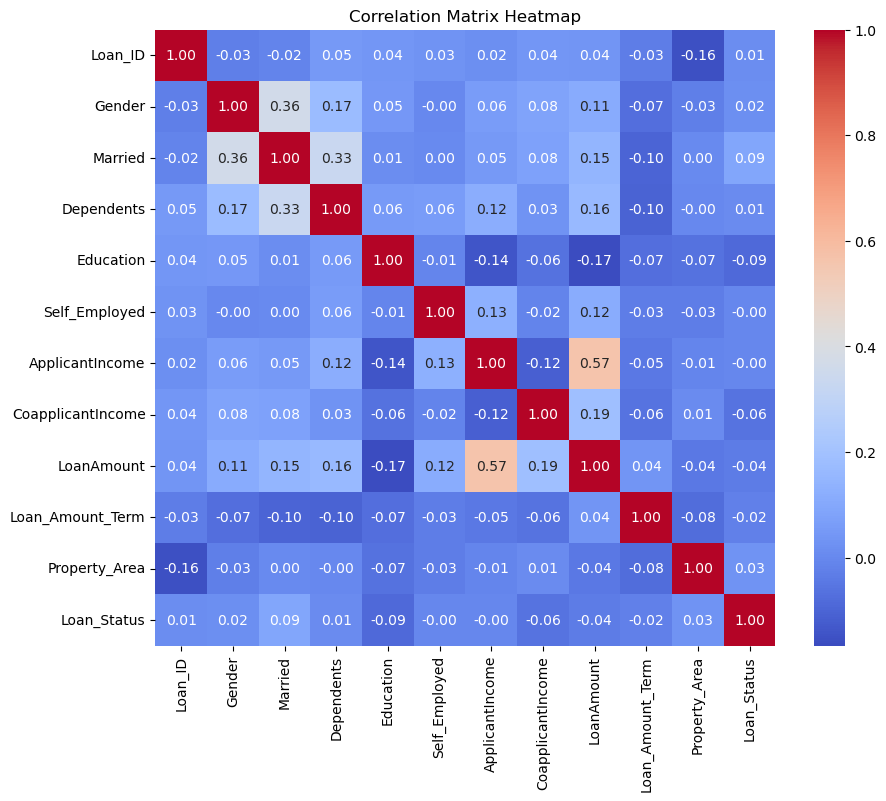

In [32]:

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Outcome:

Loan_ID: Shows a very weak positive correlation of 1% with the target column. It indicates an almost negligible relationship.
    

Gender: Displays a very weak positive correlation of 2% with the target column, suggesting a minor but still very low association.
    

Married: Indicates a moderate positive correlation of 9% with the target column, implying a fair relationship but not highly significant.
    

Dependents: Shows a very weak positive correlation of 1% with the target column, indicating a minimal relationship.
    

Education: Exhibits a weak negative correlation of -9% with the target column, suggesting a subtle but negative bond, likely not a strong relationship.
    

Self_Employed: Shows no correlation (0%) with the target column, implying no linear relationship.
    

ApplicantIncome: Indicates no correlation (0%) with the target column, suggesting no linear relationship.
    

CoapplicantIncome: Displays a weak negative correlation of -6% with the target column, indicating a weak negative relationship.
    

LoanAmount: Shows a weak negative correlation of -4% with the target column, suggesting a subtle negative relationship.
    

Loan_Amount_Term: Displays a very weak negative correlation of -2% with the target column, suggesting a very minor negative relationship.
    

Property_Area: Indicates a very weak positive correlation of 3% with the target column, implying a negligible but positive relationship.

# Check outliers of numerical Columns

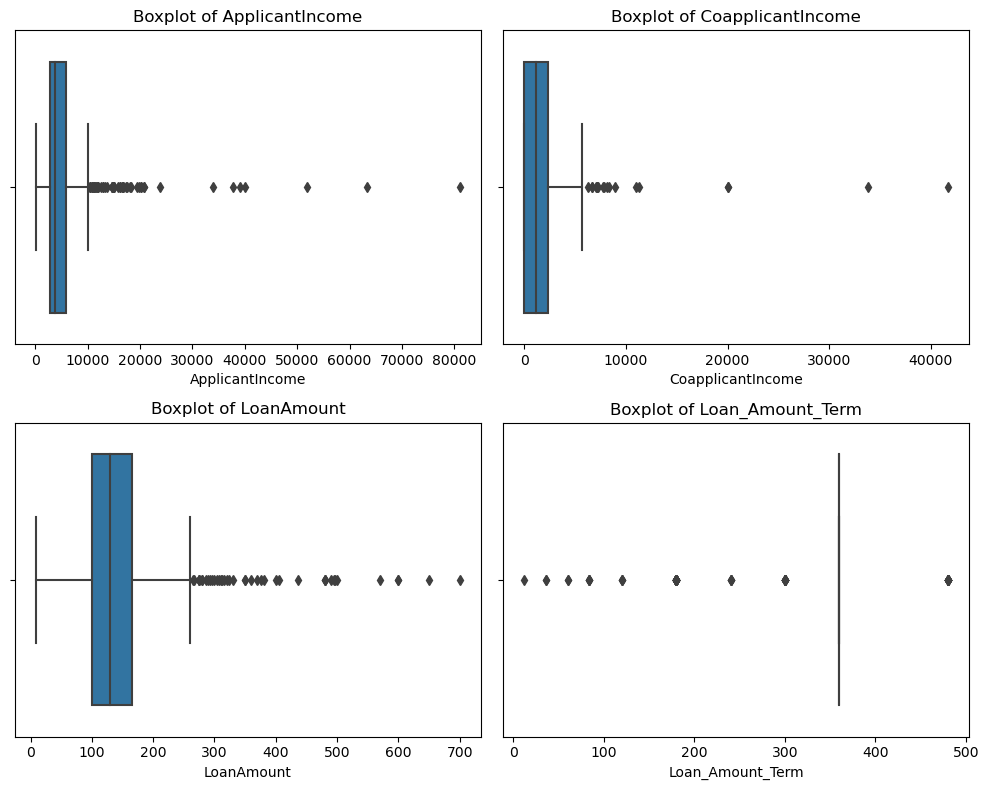

In [33]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(10, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

outliers present in this numerical column.

# Check Skewness

In [34]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness are present in the dataset

# Data Cleaning

In [35]:
# Dropping categorical columns and the target column
x = df.drop(["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"], axis=1)
y = df["Loan_Status"]


In [36]:
from sklearn.preprocessing import power_transform


# Apply power transform to the entire DataFrame 'x'
x_transformed = power_transform(x) 

# Convert the transformed array back to a DataFrame with the original columns
x_transformed = pd.DataFrame(x_transformed, columns=x.columns)

# Display the transformed data
x_transformed


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.544331,-1.102837,0.235387,0.175540,0.411733
1,0.170974,0.750578,-0.037659,0.175540,0.411733
2,-0.499955,-1.102837,-1.346305,0.175540,0.411733
3,-0.743873,0.891686,-0.167886,0.175540,0.411733
4,0.582817,-1.102837,0.158610,0.175540,0.411733
...,...,...,...,...,...
609,-0.554885,-1.102837,-1.205100,0.175540,0.411733
610,-0.000290,-1.102837,-2.293317,-2.312879,0.411733
611,1.023487,0.208603,1.372409,0.175540,0.411733
612,0.931750,-1.102837,0.738924,0.175540,0.411733


In [37]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire DataFrame 'x_numerical'
x = scaler.fit_transform(x)


In [38]:
print(x)

[[ 0.07299082 -0.55448733  0.          0.2732313   0.41173269]
 [-0.13441195 -0.03873155 -0.21927331  0.2732313   0.41173269]
 [-0.39374734 -0.55448733 -0.957641    0.2732313   0.41173269]
 ...
 [ 0.43717437 -0.47240418  1.26937121  0.2732313   0.41173269]
 [ 0.35706382 -0.55448733  0.4833669   0.2732313   0.41173269]
 [-0.13441195 -0.55448733 -0.15972753  0.2732313  -2.42876026]]


In [39]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'x' is your feature matrix and 'y' is your target variable
# x contains the features and y contains the target variable (class labels)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to create synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)




In [40]:
y_resampled.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

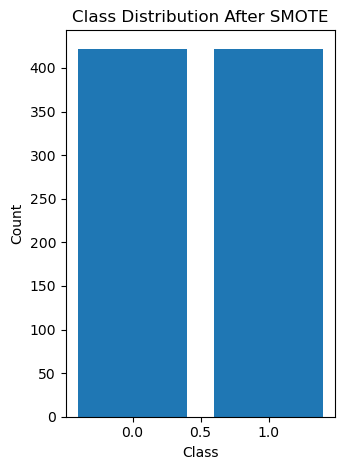

In [42]:
class_distribution_after = y_resampled.value_counts() 
plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.index, class_distribution_after.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

now label is balanced

# Best Random state

In [44]:
from sklearn.linear_model import LogisticRegression
best_accuracy = 0
best_random_state = 0

for i in range(1, 601):
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=i, stratify=y_resampled)
    model = LogisticRegression(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = i

print('The best accuracy is', best_accuracy, 'on Random State', best_random_state)

The best accuracy is 0.7677725118483413 on Random State 134


In [49]:
from sklearn.model_selection import train_test_split

# Splitting the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=134)


# Model Training

# Logistic Regression

In [50]:
# Create a Logistic Regression model
LR = LogisticRegression()
LR.fit(x_train, y_train)

# Predict using the test set
pred_lr = LR.predict(x_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))
print("Classification Report:\n", classification_report(y_test, pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.6824644549763034
Confusion Matrix:
 [[ 38  64]
 [  3 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.37      0.53       102
           1       0.62      0.97      0.76       109

    accuracy                           0.68       211
   macro avg       0.78      0.67      0.65       211
weighted avg       0.77      0.68      0.65       211



# SVC

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming x_train, y_train, x_test, y_test are defined

# Create an SVC model
svc = SVC()
svc.fit(x_train, y_train)

# Predict using the test set
pred_svc = svc.predict(x_test)

# Evaluate the SVC model
print("SVC Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svc))
print("Classification Report:\n", classification_report(y_test, pred_svc))


SVC Model Evaluation:
Accuracy: 0.6540284360189573
Confusion Matrix:
 [[42 60]
 [13 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.41      0.54       102
           1       0.62      0.88      0.72       109

    accuracy                           0.65       211
   macro avg       0.69      0.65      0.63       211
weighted avg       0.69      0.65      0.63       211



# DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming x_train, y_train, x_test, y_test are defined

# Create a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Predict using the test set
pred_dt = dt.predict(x_test)

# Evaluate the Decision Tree model
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))
print("Classification Report:\n", classification_report(y_test, pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.6966824644549763
Confusion Matrix:
 [[74 28]
 [36 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       102
           1       0.72      0.67      0.70       109

    accuracy                           0.70       211
   macro avg       0.70      0.70      0.70       211
weighted avg       0.70      0.70      0.70       211



# RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming x_train, y_train, x_test, y_test are defined

# Create a Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Predict using the test set
pred_rf = rf.predict(x_test)

# Evaluate the Random Forest model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))
print("Classification Report:\n", classification_report(y_test, pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.7345971563981043
Confusion Matrix:
 [[68 34]
 [22 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       102
           1       0.72      0.80      0.76       109

    accuracy                           0.73       211
   macro avg       0.74      0.73      0.73       211
weighted avg       0.74      0.73      0.73       211



# Cross Validation Score For model

In [54]:
from sklearn.model_selection import cross_val_score

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC()
}


for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')  # Assuming 5-fold cross-validation
    print(f"{clf_name} Mean Accuracy:", scores.mean())


Logistic Regression Mean Accuracy: 0.809462881514061
Decision Tree Mean Accuracy: 0.7150206584033054
Random Forest Mean Accuracy: 0.7801279488204719
SVC Mean Accuracy: 0.8012928162068507
